In [12]:
# This script get summary statistics for fig1B
# Author: yur97

import sys
sys.path.append('../src')

import pickle
from ceres_infer.analyses import *
from ceres_infer.data import stats_Crispr, scale_data

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Read in data
dm_data = pickle.load(open('../out/20.0817 proc_data/gene_effect/dm_data.pkl','rb'))

In [42]:
def plot_summ(dat, name):
    
    # get summary statistics
    medf=dat.median(axis=0)
    stdf = dat.std(axis=0)
    meadf = dat.mean(axis=0)
    cvdf = stdf/meadf
    medf.name = 'Median'
    stdf.name = 'Standard deviation'
    meadf.name = 'Mean'
    cvdf.name = 'Coefficient of Variation'
    
    #plot
    sns.set_style("dark")
    sns.set(font_scale=1)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
    fig.suptitle('%s Summary'%(name))
    

    sns.boxplot(y=stdf, ax = axes[0],color="skyblue")
#     sns.swarmplot(y=stdf, ax = axes[0],color="grey", alpha = 0.15)
    sns.boxplot(y=cvdf,ax=axes[1],palette="coolwarm")
#     sns.swarmplot(y=cvdf,ax=axes[1],color="grey", alpha = 0.15)

    fig.tight_layout(pad=2.5)

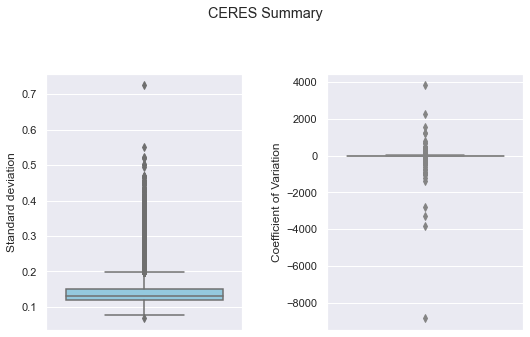

In [43]:
plot_summ(dm_data.df_crispr, 'CERES')

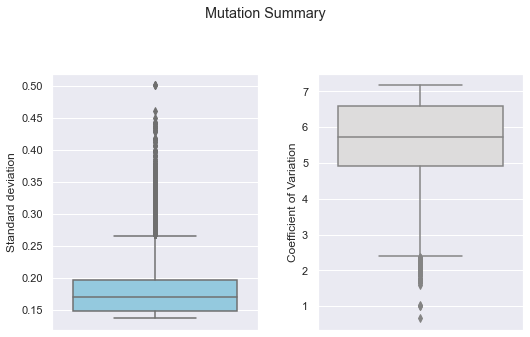

In [44]:
plot_summ(dm_data.df_mut, 'Mutation')

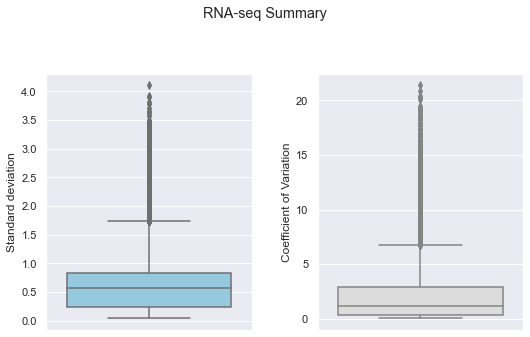

In [45]:
plot_summ(dm_data.df_rnaseq,'RNA-seq')

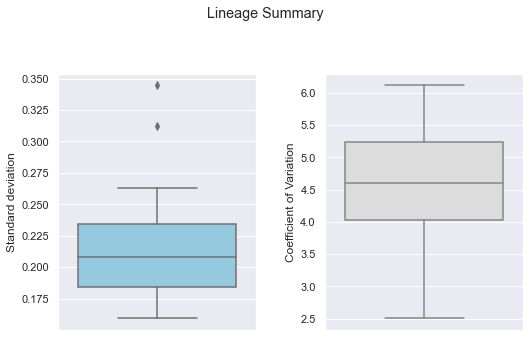

In [46]:
plot_summ(dm_data.df_lineage, 'Lineage')

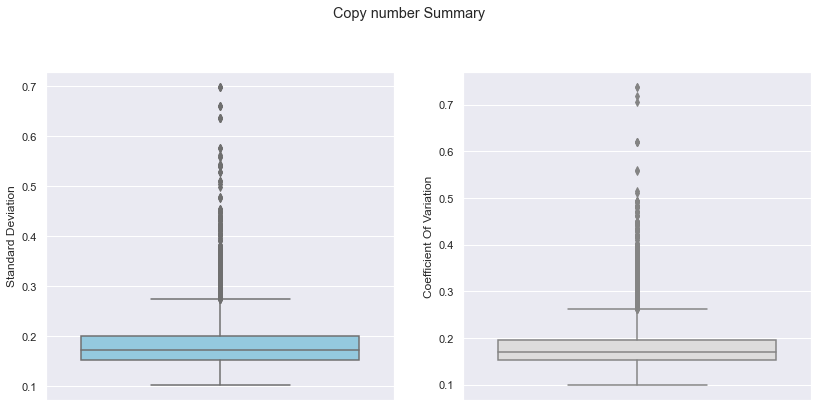

In [41]:
plot_summ(dm_data.df_cn, 'Copy number')